<img src="./data/1200px-BTC_Logo.svg.png" 
    style="width:50px" >

<hr style="margin-bottom: 40px">

<img src="./data/bitcoin-bg.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Example
### Bitcoin price

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **Getting and Plotting Prices** 

In [2]:
import requests
import pandas as pd

In [3]:
def get_historic_price(symbol="btc", exchange="binance", after="2018-09-01") :
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange
    )
    resp = requests.get(url, params={
        'periods' : '3600',
        'after' : str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns={
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    })
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-09-17 15:45:12.268570')

In [6]:
btc = get_historic_price('btc', 'bitfinex', after=last_week)
eth = get_historic_price('eth', exchange='bitfinex', after=last_week)

In [7]:
btc.head()

,Volume,LowPrice,ClosePrice,OpenPrice,HighPrice,NA
CloseTime,,,,,,
2021-09-17 16:00:00,47521.00000,47641.954957,47471.00000,47521.0,130.697154,6.212896e+06
2021-09-17 17:00:00,47549.00000,47740.000000,47385.77399,47640.0,67.557320,3.216709e+06
2021-09-17 18:00:00,47646.00000,47681.000000,47235.00000,47278.0,80.150641,3.802542e+06
2021-09-17 19:00:00,47274.23253,47330.000000,46771.00000,47199.0,337.759390,1.587552e+07
2021-09-17 20:00:00,47198.00000,47547.000000,47107.00000,47506.0,51.942020,2.457179e+06


<AxesSubplot:xlabel='CloseTime'>

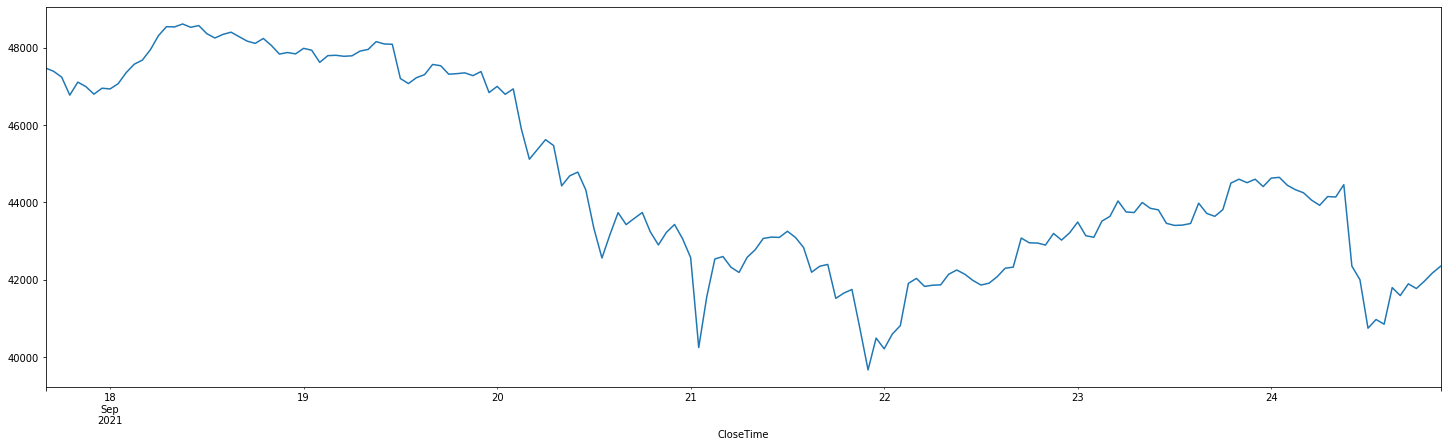

In [10]:
btc['ClosePrice'].plot(figsize=(25,7))

<AxesSubplot:xlabel='CloseTime'>

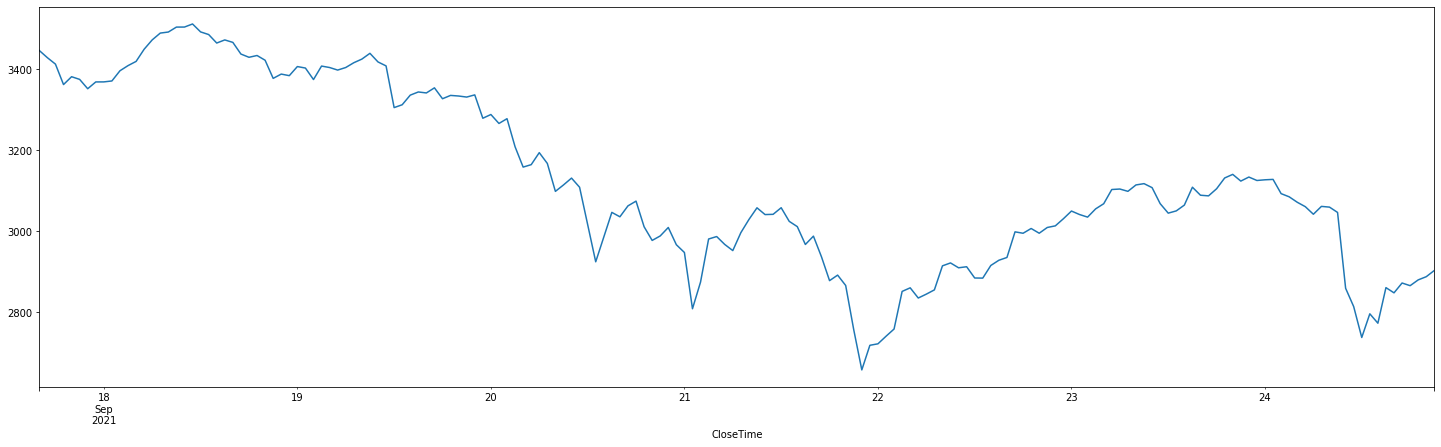

In [12]:
eth['ClosePrice'].plot(figsize=(25,7))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **Dynamic plots with Bokeh** 

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [16]:
output_notebook()

Loading BokehJS ...

In [19]:
pl = figure(x_axis_type="datetime", title='Crypto Prices', width=800)
pl.grid.grid_line_alpha=0.3
pl.xaxis.axis_label = 'Date'
pl.yaxis.axis_label = 'Price'
pl.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#pl.line(eth.index, eth['ClosePrice'], color='#a6cee3', legend='Ether')

pl.legend.location = "top_left"

show(pl)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **Export to Excel** 

In [22]:
writer = pd.ExcelWriter("./data/cryptos.xlsx")

In [23]:
btc.to_excel(writer, sheet_name="Bitcoin")
eth.to_excel(writer, sheet_name="Ether")

In [24]:
writer.save()